In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ryanholbrook_dl_course_data_path = kagglehub.dataset_download('ryanholbrook/dl-course-data')

print('Data source import complete.')


100%|██████████| 231M/231M [00:01<00:00, 133MB/s]

Extracting files...


Data source import complete.


In [ ]:
! ls $ryanholbrook_dl_course_data_path

abalone.csv  concrete.csv     fuel.csv	   ion.csv	 spotify.csv
candy.csv    diamonds.csv     hotel.csv    red-wine.csv
cereal.csv   forestfires.csv  housing.csv  songs.csv


In [ ]:
y

,is_canceled
0,0
1,0
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


# 1. Single Neuron

## Introduction #

In this lesson we're going to see how we can build neural networks capable of learning the complex kinds of relationships deep neural nets are famous for.

The key idea here is *modularity*, building up a complex network from simpler functional units. We've seen how a linear unit computes a linear function -- now we'll see how to combine and modify these single units to model more complex relationships.

## Layers #

Neural networks typically organize their neurons into **layers**. When we collect together linear units having a common set of inputs we get a **dense** layer.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/2MA4iMV.png" width="300" alt="A stack of three circles in an input layer connected to two circles in a dense layer.">
<figcaption style="textalign: center; font-style: italic"><center>A dense layer of two linear units receiving two inputs and a bias.
</center></figcaption>
</figure>

You could think of each layer in a neural network as performing some kind of relatively simple transformation. Through a deep stack of layers, a neural network can transform its inputs in more and more complex ways. In a well-trained neural network, each layer is a transformation getting us a little bit closer to a solution.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
    <strong>Many Kinds of Layers</strong><br>
A "layer" in Keras is a very general kind of thing. A layer can be, essentially, any kind of <em>data transformation</em>. Many layers, like the <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D">convolutional</a> and <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/RNN">recurrent</a> layers, transform data through use of neurons and differ primarily in the pattern of connections they form. Others though are used for <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding">feature engineering</a> or just <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Add">simple arithmetic</a>. There's a whole world of layers to discover -- <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers">check them out</a>!
</blockquote>

# The Activation Function #

It turns out, however, that two dense layers with nothing in between are no better than a single dense layer by itself. Dense layers by themselves can never move us out of the world of lines and planes. What we need is something *nonlinear*. What we need are activation functions.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/OLSUEYT.png" width="400" alt=" ">
<figcaption style="textalign: center; font-style: italic"><center>Without activation functions, neural networks can only learn linear relationships. In order to fit curves, we'll need to use activation functions.
</center></figcaption>
</figure>

An **activation function** is simply some function we apply to each of a layer's outputs (its *activations*). The most common is the *rectifier* function $max(0, x)$.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/aeIyAlF.png" width="400" alt="A graph of the rectifier function. The line y=x when x>0 and y=0 when x<0, making a 'hinge' shape like '_/'.">
<figcaption style="textalign: center; font-style: italic"><center>
</center></figcaption>
</figure>

The rectifier function has a graph that's a line with the negative part "rectified" to zero. Applying the function to the outputs of a neuron will put a *bend* in the data, moving us away from simple lines.

When we attach the rectifier to a linear unit, we get a **rectified linear unit** or **ReLU**. (For this reason, it's common to call the rectifier function the "ReLU function".)  Applying a ReLU activation to a linear unit means the output becomes `max(0, w * x + b)`, which we might draw in a diagram like:

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/eFry7Yu.png" width="250" alt="Diagram of a single ReLU. Like a linear unit, but instead of a '+' symbol we now have a hinge '_/'. ">
<figcaption style="textalign: center; font-style: italic"><center>A rectified linear unit.
</center></figcaption>
</figure>

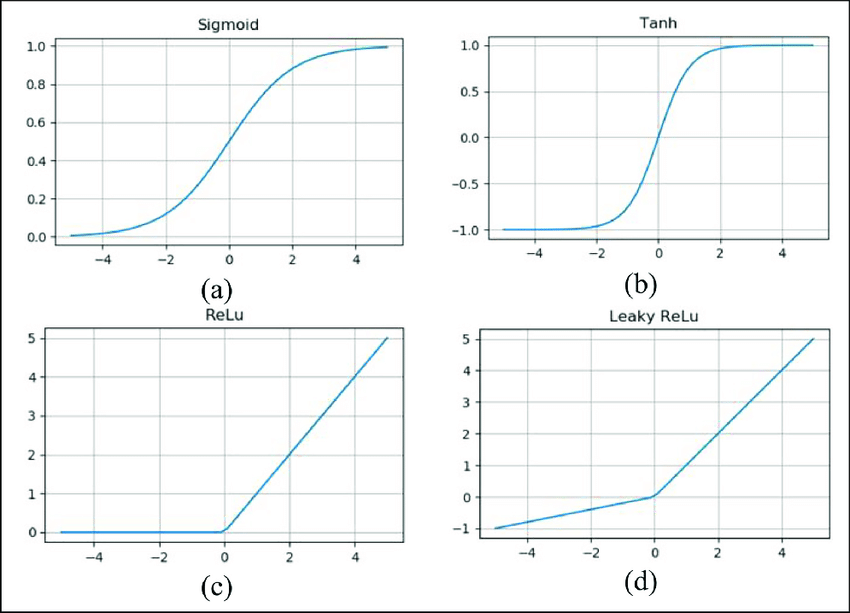

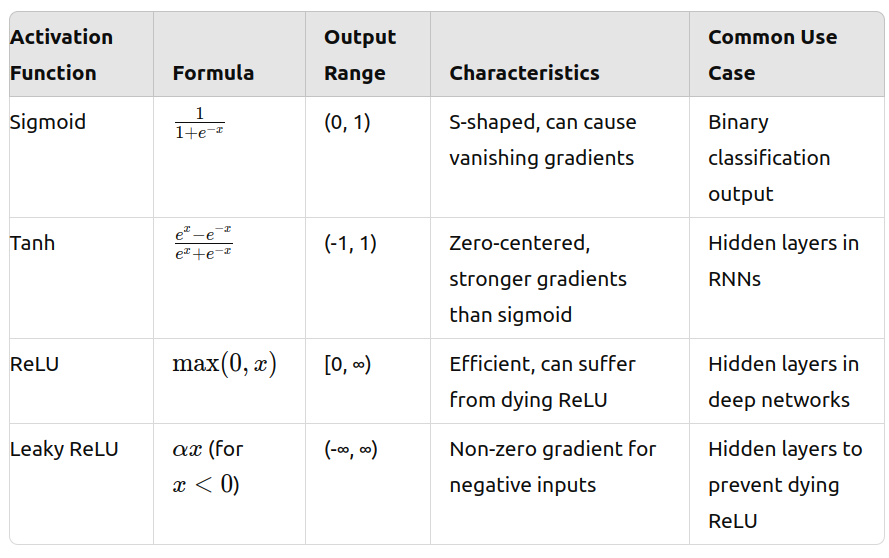

# Stacking Dense Layers #

Now that we have some nonlinearity, let's see how we can stack layers to get complex data transformations.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/Y5iwFQZ.png" width="450" alt="An input layer, two hidden layers, and a final linear layer.">
<figcaption style="textalign: center; font-style: italic"><center>A stack of dense layers makes a "fully-connected" network.
</center></figcaption>
</figure>

The layers before the output layer are sometimes called **hidden** since we never see their outputs directly.

Now, notice that the final (output) layer is a linear unit (meaning, no activation function). That makes this network appropriate to a regression task, where we are trying to predict some arbitrary numeric value. Other tasks (like classification) might require an activation function on the output.

## Building Sequential Models ##

The `Sequential` model we've been using will connect together a list of layers in order from first to last: the first layer gets the input, the last layer produces the output. This creates the model in the figure above:

In [ ]:
2,4,8,16,32

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Input([2]),
    layers.Dense(units=4, activation='relu'),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer
    layers.Dense(units=1),
])

# Deep Neural Networks

Now we will:
- create a **fully-connected** neural network architecture
- apply neural nets to two classic ML problems: **regression** and **classification**
- train neural nets with **stochastic gradient descent**, and
- improve performance with **dropout**, **batch normalization**, and other techniques


Let's get started!

# What is Deep Learning? #

Some of the most impressive advances in artificial intelligence in recent years have been in the field of *deep learning*. Natural language translation, image recognition, and game playing are all tasks where deep learning models have neared or even exceeded human-level performance.

So what is deep learning? **Deep learning** is an approach to machine learning characterized by deep stacks of computations. This depth of computation is what has enabled deep learning models to disentangle the kinds of complex and hierarchical patterns found in the most challenging real-world datasets.

Through their power and scalability **neural networks** have become the defining model of deep learning.  Neural networks are composed of neurons, where each neuron individually performs only a simple computation. The power of a neural network comes instead from the complexity of the connections these neurons can form.

# The Linear Unit #

So let's begin with the fundamental component of a neural network: the individual neuron. As a diagram, a **neuron** (or **unit**) with one input looks like:

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/mfOlDR6.png" width="250" alt="Diagram of a linear unit.">
<figcaption style="textalign: center; font-style: italic"><center>The Linear Unit: $y = w x + b$
</center></figcaption>
</figure>

The input is `x`. Its connection to the neuron has a **weight** which is `w`. Whenever a value flows through a connection, you multiply the value by the connection's weight. For the input `x`, what reaches the neuron is `w * x`. A neural network "learns" by modifying its weights.

The `b` is a special kind of weight we call the **bias**. The bias doesn't have any input data associated with it; instead, we put a `1` in the diagram so that the value that reaches the neuron is just `b` (since `1 * b = b`). The bias enables the neuron to modify the output independently of its inputs.

The `y` is the value the neuron ultimately outputs. To get the output, the neuron sums up all the values it receives through its connections. This neuron's activation is `y = w * x + b`, or as a formula $y = w x + b$.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
    <strong>Does the formula $y=w x + b$ look familiar?</strong><br>
It's an equation of a line! It's the slope-intercept equation, where $w$ is the slope and $b$ is the y-intercept.
</blockquote>

# Example - The Linear Unit as a Model #

Though individual neurons will usually only function as part of a larger network, it's often useful to start with a single neuron model as a baseline. Single neuron models are *linear* models.

Let's think about how this might work on a dataset like [80 Cereals](https://www.kaggle.com/crawford/80-cereals). Training a model with `'sugars'` (grams of sugars per serving) as input and `'calories'` (calories per serving) as output, we might find the bias is `b=90` and the weight is `w=2.5`. We could estimate the calorie content of a cereal with 5 grams of sugar per serving like this:

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/yjsfFvY.png" width="1000" alt="Computing with the linear unit.">
<figcaption style="textalign: center; font-style: italic"><center>Computing with the linear unit.
</center></figcaption>
</figure>

And, checking against our formula, we have $calories = 2.5 \times 5 + 90 = 102.5$, just like we expect.

# Multiple Inputs #

The *80 Cereals* dataset has many more features than just `'sugars'`. What if we wanted to expand our model to include things like fiber or protein content? That's easy enough. We can just add more input connections to the neuron, one for each additional feature. To find the output, we would multiply each input to its connection weight and then add them all together.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/vyXSnlZ.png" width="300" alt="Three input connections: x0, x1, and x2, along with the bias.">
<figcaption style="textalign: center; font-style: italic"><center>A linear unit with three inputs.
</center></figcaption>
</figure>

The formula for this neuron would be $y = w_0 x_0 + w_1 x_1 + w_2 x_2 + b$. A linear unit with two inputs will fit a plane, and a unit with more inputs than that will fit a hyperplane.

# Linear Units in Keras #

The easiest way to create a model in Keras is through `keras.Sequential`, which creates a neural network as a stack of *layers*. We can create models like those above using a *dense* layer (which we'll learn more about in the next lesson).

We could define a linear model accepting three input features (`'sugars'`, `'fiber'`, and `'protein'`) and producing a single output (`'calories'`) like so:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Input([3]),
    layers.Dense(units=1) #layer
])

With the first argument, `units`, we define how many outputs we want. In this case we are just predicting `'calories'`, so we'll use `units=1`.

With the second argument, `input_shape`, we tell Keras the dimensions of the inputs. Setting `input_shape=[3]` ensures the model will accept three features as input (`'sugars'`, `'fiber'`, and `'protein'`).

This model is now ready to be fit to training data!

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
    <strong>Why is <code>input_shape</code> a Python list?</strong><br>
The data we'll use in this course will be tabular data, like in a Pandas dataframe. We'll have one input for each feature in the dataset. The features are arranged by column, so we'll always have <code>input_shape=[num_columns]</code>.

The reason Keras uses a list here is to permit use of more complex datasets. Image data, for instance, might need three dimensions: <code>[height, width, channels]</code>.
</blockquote>



# Stochastic Gradient Descent

# Introduction #

As with all machine learning tasks, we begin with a set of training data. Each example in the training data consists of some features (the inputs) together with an expected target (the output). Training the network means adjusting its weights in such a way that it can transform the features into the target. In the *80 Cereals* dataset, for instance, we want a network that can take each cereal's `'sugar'`, `'fiber'`, and `'protein'` content and produce a prediction for that cereal's `'calories'`. If we can successfully train a network to do that, its weights must represent in some way the relationship between those features and that target as expressed in the training data.

In addition to the training data, we need two more things:
- A "loss function" that measures how good the network's predictions are.
- An "optimizer" that can tell the network how to change its weights.

# The Loss Function #

We've seen how to design an architecture for a network, but we haven't seen how to tell a network *what* problem to solve. This is the job of the loss function.

The **loss function** measures the disparity between the the target's true value and the value the model predicts.

Different problems call for different loss functions. We have been looking at **regression** problems, where the task is to predict some numerical value -- calories in *80 Cereals*, rating in *Red Wine Quality*. Other regression tasks might be predicting the price of a house or the fuel efficiency of a car.

A common loss function for regression problems is the **mean absolute error** or **MAE**. For each prediction `y_pred`, MAE measures the disparity from the true target `y_true` by an absolute difference `abs(y_true - y_pred)`.

The total MAE loss on a dataset is the mean of all these absolute differences.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/VDcvkZN.png" width="500" alt="A graph depicting error bars from data points to the fitted line..">
<figcaption style="textalign: center; font-style: italic"><center>The mean absolute error is the average length between the fitted curve and the data points.
</center></figcaption>
</figure>

Besides MAE, other loss functions you might see for regression problems are the mean-squared error (MSE) or the Huber loss (both available in Keras).

During training, the model will use the loss function as a guide for finding the correct values of its weights (lower loss is better). In other words, the loss function tells the network its objective.

# The Optimizer - Stochastic Gradient Descent #

We've described the problem we want the network to solve, but now we need to say *how* to solve it. This is the job of the **optimizer**. The optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called **stochastic gradient descent**. They are iterative algorithms that train a network in steps. One **step** of training goes like this:
1. Sample some training data and run it through the network to make predictions.
2. Measure the loss between the predictions and the true values.
3. Finally, adjust the weights in a direction that makes the loss smaller.

Then just do this over and over until the loss is as small as you like (or until it won't decrease any further.)

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/rFI1tIk.gif" width="1600" alt="Fitting a line batch by batch. The loss decreases and the weights approach their true values.">
<figcaption style="textalign: center; font-style: italic"><center>Training a neural network with Stochastic Gradient Descent.
</center></figcaption>
</figure>

Each iteration's sample of training data is called a **minibatch** (or often just "batch"), while a complete round of the training data is called an **epoch**. The number of epochs you train for is how many times the network will see each training example.

The animation shows the linear model from Lesson 1 being trained with SGD. The pale red dots depict the entire training set, while the solid red dots are the minibatches. Every time SGD sees a new minibatch, it will shift the weights (`w` the slope and `b` the y-intercept) toward their correct values on that batch. Batch after batch, the line eventually converges to its best fit. You can see that the loss gets smaller as the weights get closer to their true values.

## Learning Rate and Batch Size ##

Notice that the line only makes a small shift in the direction of each batch (instead of moving all the way). The size of these shifts is determined by the **learning rate**. A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values.

The learning rate and the size of the minibatches are the two parameters that have the largest effect on how the SGD training proceeds. Their interaction is often subtle and the right choice for these parameters isn't always obvious. (We'll explore these effects in the exercise.)

Fortunately, for most work it won't be necessary to do an extensive hyperparameter search to get satisfactory results. **Adam** is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

## Adding the Loss and Optimizer ##

After defining a model, you can add a loss function and optimizer with the model's `compile` method:

```
model.compile(
    optimizer="adam",
    loss="mae",
)
```

Notice that we are able to specify the loss and optimizer with just a string. You can also access these directly through the Keras API -- if you wanted to tune parameters, for instance -- but for us, the defaults will work fine.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
    <strong>What's In a Name?</strong><br>
The <strong>gradient</strong> is a vector that tells us in what direction the weights need to go. More precisely, it tells us how to change the weights to make the loss change <em>fastest</em>. We call our process gradient <strong>descent</strong> because it uses the gradient to <em>descend</em> the loss curve towards a minimum. <strong>Stochastic</strong> means "determined by chance." Our training is <em>stochastic</em> because the minibatches are <em>random samples</em> from the dataset. And that's why it's called SGD!
</blockquote>

Optimizers:
1. **Batch Gradient Descent**

Definition: Calculates the gradient of the loss function using the entire training dataset before updating the model parameters.


Pros:
Stable convergence: Because it uses all data, the updates are more consistent and less noisy.
Good for smaller datasets.


Cons:
Slow: Requires a lot of memory and can be computationally expensive, especially with large datasets.
Takes longer to see updates, which can slow down learning.
2. **Stochastic Gradient Descent (SGD)**


Definition: Updates the model parameters using only one training example at a time, randomly selected from the dataset.


Pros:
Fast: Each update is quick since it uses only one example, allowing the model to learn more rapidly.
Can escape local minima: The noise from using individual examples can help the model explore the loss surface better.


Cons:
Noisy updates: The updates can be quite erratic, leading to a less stable convergence path.
Might converge to a suboptimal solution because of the high variance in updates.
3. **Mini-Batch Gradient Descent**


Definition: A compromise between batch gradient descent and SGD; it uses a small, random subset of the training data (mini-batch) to compute the gradient before updating the parameters.


Pros:
Balanced speed and stability: It offers a good trade-off between the noisy updates of SGD and the slow updates of batch gradient descent.
Efficient use of hardware: Can take advantage of vectorized operations, making it faster on modern hardware (like GPUs).


Cons:
Choosing the right batch size: The performance can depend on the size of the mini-batch; too small can lead to noise, too large can slow down updates.


Summary


**Batch GD** : Uses the whole dataset, stable but slow.

**SGD** : Uses one example at a time, fast but noisy.

**Mini-Batch GD**: Uses a small subset of examples, balances speed and stability effectively.

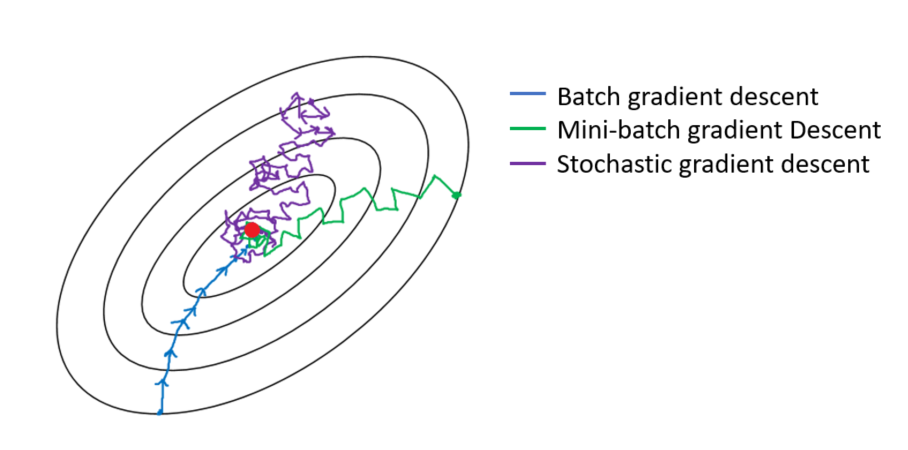

### Other optimizers

1. **Momentum with SGD**

  Concept: Momentum focuses on speeding up the training process by combining the current gradient with previous gradients. It helps smooth out updates and prevents the model from getting stuck in small oscillations.
    
  Effect on Training: It can lead to faster convergence in areas with lots of bumps, but it might overshoot the minimum if the learning rate is too high.

  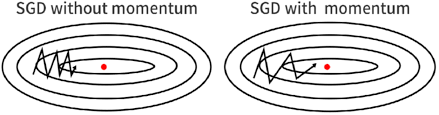

2. **RMSprop (Root Mean Square Propagation)**

  Concept: RMSprop adapts the learning rate for each parameter based on the magnitude of recent gradients. It helps stabilize training by ensuring that parameters with larger gradients take smaller steps and those with smaller gradients take larger steps.

  Effect on Training: This adaptive approach allows the model to learn more effectively in situations where gradients vary greatly. It works well for non-stationary problems (where the data distribution changes over time).
  
3. **Adam (Adaptive Moment Estimation)**

  Concept: Adam combines the benefits of Momentum and RMSprop. It maintains two running averages: one for the average of past gradients (keeps track of direction of past slopes) (like Momentum) and one for the average of squared gradients (like RMSprop). This means it adapts both the
  direction and the step size dynamically.

  Effect on Training: Adam often leads to faster convergence and better performance across a wide range of tasks without needing much tuning. It handles varying gradients effectively, making it a popular choice for many machine learning problems.

# Example - Red Wine Quality #

Now we know everything we need to start training deep learning models. So let's see it in action! We'll use the *Red Wine Quality* dataset.

This dataset consists of physiochemical measurements from about 1600 Portuguese red wines. Also included is a quality rating for each wine from blind taste-tests. How well can we predict a wine's perceived quality from these measurements?

We've put all of the data preparation into this next hidden cell. It's not essential to what follows so feel free to skip it. One thing you might note for now though is that we've rescaled each feature to lie in the interval $[0, 1]$. As we'll discuss more in Lesson 5, neural networks tend to perform best when their inputs are on a common scale.

In [ ]:

import pandas as pd
from IPython.display import display

red_wine = pd.read_csv(f'{ryanholbrook_dl_course_data_path}/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


How many inputs should this network have? We can discover this by looking at the number of columns in the data matrix. Be sure not to include the target (`'quality'`) here -- only the input features.

In [ ]:
print(X_train.shape)

(1119, 11)


Eleven columns means eleven inputs.

We've chosen a three-layer network with over 1500 neurons. This network should be capable of learning fairly complex relationships in the data.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input([X_train.shape[1]]),
    layers.Dense(256, activation='relu'), #1
    layers.Dense(128, activation='relu'), #2
    # layers.Dense(128, activation='relu'), #3
    layers.Dense(1),
])

Deciding the architecture of your model should be part of a process. Start simple and use the validation loss as your guide. You'll learn more about model development in the exercises.

After defining the model, we compile in the optimizer and loss function.

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae'
)

Now we're ready to start the training! We've told Keras to feed the optimizer 256 rows of the training data at a time (the `batch_size`) and to do that 10 times all the way through the dataset (the `epochs`).

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.4159 - val_loss: 0.1576
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1537 - val_loss: 0.1838
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1703 - val_loss: 0.1394
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1323 - val_loss: 0.1454
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1318 - val_loss: 0.1240
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1230 - val_loss: 0.1194
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1191 - val_loss: 0.1134
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1150 - val_loss: 0.1120
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1086 - val_loss: 0.1073
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1079 - val_loss: 0.1078


You can see that Keras will keep you updated on the loss as the model trains.

Often, a better way to view the loss though is to plot it. The `fit` method in fact keeps a record of the loss produced during training in a `History` object. We'll convert the data to a Pandas dataframe, which makes the plotting easy.

In [ ]:
history.history

{'loss': [0.3652764856815338,
  0.16296935081481934,
  0.15720191597938538,
  0.13225701451301575,
  0.13192227482795715,
  0.12065982073545456,
  0.1182369738817215,
  0.11277887225151062,
  0.10999979823827744,
  0.10810660570859909],
 'val_loss': [0.15758556127548218,
  0.1838323473930359,
  0.1394219696521759,
  0.14541615545749664,
  0.12403424829244614,
  0.11938399821519852,
  0.11342797428369522,
  0.11202667653560638,
  0.10725297778844833,
  0.10776201635599136]}

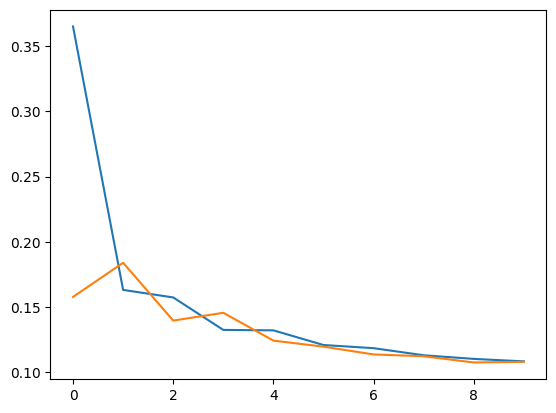

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();
history_df['val_loss'].plot();

Notice how the loss levels off as the epochs go by. When the loss curve becomes horizontal like that, it means the model has learned all it can and there would be no reason continue for additional epochs.

# Overfitting and Underfitting



## Interpreting the Learning Curves #

You might think about the information in the training data as being of two kinds: *signal* and *noise*. The signal is the part that generalizes, the part that can help our model make predictions from new data. The noise is that part that is *only* true of the training data; the noise is all of the random fluctuation that comes from data in the real-world or all of the incidental, non-informative patterns that can't actually help the model make predictions. The noise is the part might look useful but really isn't.

We train a model by choosing weights or parameters that minimize the loss on a training set. You might know, however, that to accurately assess a model's performance, we need to evaluate it on a new set of data, the *validation* data. (You could see our lesson on [model validation](https://www.kaggle.com/dansbecker/model-validation) in *Introduction to Machine Learning* for a review.)

When we train a model we've been plotting the loss on the training set epoch by epoch. To this we'll add a plot the validation data too. These plots we call the **learning curves**. To train deep learning models effectively, we need to be able to interpret them.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/tHiVFnM.png" width="500" alt="A graph of training and validation loss.">
<figcaption style="textalign: center; font-style: italic"><center>The validation loss gives an estimate of the expected error on unseen data.
</center></figcaption>
</figure>

Now, the training loss will go down either when the model learns signal or when it learns noise. But the validation loss will go down only when the model learns signal. (Whatever noise the model learned from the training set won't generalize to new data.) So, when a model learns signal both curves go down, but when it learns noise a *gap* is created in the curves. The size of the gap tells you how much noise the model has learned.

Ideally, we would create models that learn all of the signal and none of the noise. This will practically never happen. Instead we make a trade. We can get the model to learn more signal at the cost of learning more noise. So long as the trade is in our favor, the validation loss will continue to decrease. After a certain point, however, the trade can turn against us, the cost exceeds the benefit, and the validation loss begins to rise.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/eUF6mfo.png" width="600" alt="Two graphs. On the left, a line through a few data points with the true fit a parabola. On the right, a curve running through each datapoint with the true fit a parabola.">
<figcaption style="textalign: center; font-style: italic"><center>Underfitting and overfitting.
</center></figcaption>
</figure>

This trade-off indicates that there can be two problems that occur when training a model: not enough signal or too much noise. **Underfitting** the training set is when the loss is not as low as it could be because the model hasn't learned enough *signal*. **Overfitting** the training set is when the loss is not as low as it could be because the model learned too much *noise*. The trick to training deep learning models is finding the best balance between the two.

We'll look at a couple ways of getting more signal out of the training data while reducing the amount of noise.

# Capacity #

A model's **capacity** refers to the size and complexity of the patterns it is able to learn. For neural networks, this will largely be determined by how many neurons it has and how they are connected together. If it appears that your network is underfitting the data, you should try increasing its capacity.

You can increase the capacity of a network either by making it *wider* (more units to existing layers) or by making it *deeper* (adding more layers). Wider networks have an easier time learning more linear relationships, while deeper networks prefer more nonlinear ones. Which is better just depends on the dataset.

```
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])
```

You'll explore how the capacity of a network can affect its performance in the exercise.

# Early Stopping #

We mentioned that when a model is too eagerly learning noise, the validation loss may start to increase during training. To prevent this, we can simply stop the training whenever it seems the validation loss isn't decreasing anymore. Interrupting the training this way is called **early stopping**.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/eP0gppr.png" width=500 alt="A graph of the learning curves with early stopping at the minimum validation loss, underfitting to the left of it and overfitting to the right.">
<figcaption style="textalign: center; font-style: italic"><center>We keep the model where the validation loss is at a minimum.
</center></figcaption>
</figure>

Once we detect that the validation loss is starting to rise again, we can reset the weights back to where the minimum occured. This ensures that the model won't continue to learn noise and overfit the data.

Training with early stopping also means we're in less danger of stopping the training too early, before the network has finished learning signal. So besides preventing overfitting from training too long, early stopping can also prevent *underfitting* from not training long enough. Just set your training epochs to some large number (more than you'll need), and early stopping will take care of the rest.

## Adding Early Stopping ##

In Keras, we include early stopping in our training through a callback. A **callback** is just a function you want run every so often while the network trains. The early stopping callback will run after every epoch. (Keras has [a variety of useful callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) pre-defined, but you can [define your own](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LambdaCallback), too.)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

These parameters say: "If there hasn't been at least an improvement of 0.001 in the validation loss over the previous 20 epochs, then stop the training and keep the best model you found." It can sometimes be hard to tell if the validation loss is rising due to overfitting or just due to random batch variation. The parameters allow us to set some allowances around when to stop.

As we'll see in our example, we'll pass this callback to the `fit` method along with the loss and optimizer.

# Example - Train a Model with Early Stopping #

Let's continue developing the model from the example in the last tutorial. We'll increase the capacity of that network but also add an early-stopping callback to prevent overfitting.

Here's the data prep again.

In [ ]:

import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


Now let's increase the capacity of the network. We'll go for a fairly large network, but rely on the callback to halt the training once the validation loss shows signs of increasing.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


After defining the callback, add it as an argument in `fit` (you can have several, so put it in a list). Choose a large number of epochs when using early stopping, more than you'll need.

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.3135 - val_loss: 0.1354
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1314 - val_loss: 0.1224
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1264 - val_loss: 0.1239
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1216 - val_loss: 0.1139
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.1206 - val_loss: 0.1187
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1164 - val_loss: 0.1072
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1106 - val_loss: 0.1154
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1095 - val_loss: 0.1026
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1046 - val_loss: 0.1071
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1031 - val_loss: 0.1019
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1009 - val_loss: 0.0999
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1005 - val_lo

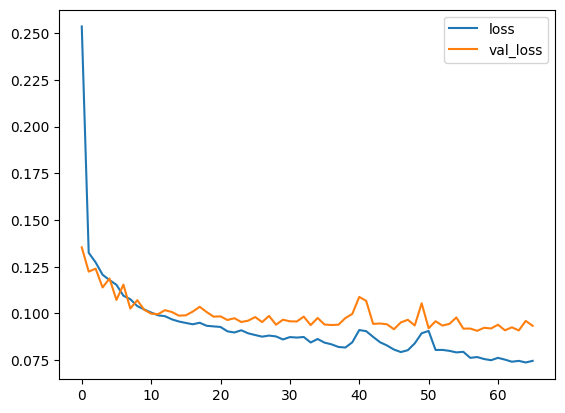

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    #verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# Dropout and Batch Normalization

# Introduction #

There's more to the world of deep learning than just dense layers. There are dozens of kinds of layers you might add to a model. (Try browsing through the [Keras docs](https://www.tensorflow.org/api_docs/python/tf/keras/layers/) for a sample!) Some are like dense layers and define connections between neurons, and others can do preprocessing or transformations of other sorts.

In this lesson, we'll learn about a two kinds of special layers, not containing any neurons themselves, but that add some functionality that can sometimes benefit a model in various ways. Both are commonly used in modern architectures.

# Dropout #

The first of these is the "dropout layer", which can help correct overfitting.

In the last lesson we talked about how overfitting is caused by the network learning spurious patterns in the training data. To recognize these spurious patterns a network will often rely on very a specific combinations of weight, a kind of "conspiracy" of weights. Being so specific, they tend to be fragile: remove one and the conspiracy falls apart.

This is the idea behind **dropout**. To break up these conspiracies, we randomly *drop out* some fraction of a layer's input units every step of training, making it much harder for the network to learn those spurious patterns in the training data. Instead, it has to search for broad, general patterns, whose weight patterns tend to be more robust.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/a86utxY.gif" width="600" alt="An animation of a network cycling through various random dropout configurations.">
<figcaption style="textalign: center; font-style: italic"><center>Here, 50% dropout has been added between the two hidden layers.</center></figcaption>
</figure>

You could also think about dropout as creating a kind of *ensemble* of networks. The predictions will no longer be made by one big network, but instead by a committee of smaller networks. Individuals in the committee tend to make different kinds of mistakes, but be right at the same time, making the committee as a whole better than any individual. (If you're familiar with random forests as an ensemble of decision trees, it's the same idea.)

## Adding Dropout ##

In Keras, the dropout rate argument `rate` defines what percentage of the input units to shut off. Put the `Dropout` layer just before the layer you want the dropout applied to:

```
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])
```


Dropout example:
### Setup
Dropout Rate: 0.2 (meaning 20% of the neurons are dropped out during training)
Number of Neurons: 5
Outputs from the Neurons during Training: Let's say the outputs from the 5 neurons (before applying dropout) are:

outputs: $$[0.5,0.3,0.2.,0.6,0.4]$$

####Training Phase
1. Applying Dropout:

With a dropout rate of 0.2, we randomly drop out 20% of the neurons. For simplicity, let's say we drop out the third neuron (index 2).
After applying dropout, the outputs become:

Outputs after Dropout= $$[0.5,0.3,0,0.6,0.4]$$
The third output is set to zero because that neuron was dropped.

2. Scaling the Outputs:

To maintain the expected output, we scale the remaining active neurons by  $$ \left(\frac{1}{1- dropout rate}\right) = \left(\frac{1}{1-0.2}\right) = 1.25 $$

Scaling the outputs gives us:
Scaled Outputs= $$[0.5×1.25,0.3×1.25,0×1.25,0.6×1.25,0.4×1.25]=$$ $$[0.625,0.375,0,0.75,0.5] $$

####Testing Phase:
* No Dropout Applied:

During testing, all neurons are active, so we use the original outputs:

Outputs during Testing= $$[0.5,0.3,0.2,0.6,0.4]$$

* Scaling During Testing:

The outputs during testing are scaled by the factor of 0.8 which is
$$(1−dropout rate=0.8):$$

Final Outputs= $$[0.5×0.8,0.3×0.8,0.2×0.8,0.6×0.8,0.4×0.8]=$$ $$[0.4,0.24,0.16,0.48,0.32]$$


# Batch Normalization #

The next special layer we'll look at performs "batch normalization" (or "batchnorm"), which can help correct training that is slow or unstable.


With neural networks, it's generally a good idea to put all of your data on a common scale, perhaps with something like scikit-learn's [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) or [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). The reason is that SGD will shift the network weights in proportion to how large an activation the data produces. Features that tend to produce activations of very different sizes can make for unstable training behavior.

Now, if it's good to normalize the data before it goes into the network, maybe also normalizing inside the network would be better! In fact, we have a special kind of layer that can do this, the **batch normalization layer**. A batch normalization layer looks at each batch as it comes in, first normalizing the batch with its own mean and standard deviation, and then also putting the data on a new scale with two trainable rescaling parameters. Batchnorm, in effect, performs a kind of coordinated rescaling of its inputs.

**Batch norm can address Internal Covariate Shift**

During training, the distribution of each layer’s inputs can change as the parameters of previous layers are updated. This change, known as internal covariate shift, can slow down training because the model has to continuously adapt to these changes.

Most often, batchnorm is added as an aid to the optimization process (though it can sometimes also help prediction performance). Models with batchnorm tend to need fewer epochs to complete training. Moreover, batchnorm can also fix various problems that can cause the training to get "stuck". Consider adding batch normalization to your models, especially if you're having trouble during training.

## Adding Batch Normalization ##

It seems that batch normalization can be used at almost any point in a network. You can put it after a layer...

```
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
```

... or between a layer and its activation function:

```
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),
```

And if you add it as the first layer of your network it can act as a kind of adaptive preprocessor, standing in for something like Sci-Kit Learn's `StandardScaler`.



# Example - Using Dropout and Batch Normalization #

Let's continue developing the *Red Wine* model. Now we'll increase the capacity even more, but add dropout to control overfitting and batch normalization to speed up optimization. This time, we'll also leave off standardizing the data, to demonstrate how batch normalization can stabalize the training.

In [ ]:

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


import pandas as pd
red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

<ipython-input-31-869ec6321b71>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


When adding dropout, you may need to increase the number of units in your `Dense` layers.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


There's nothing to change this time in how we set up the training.

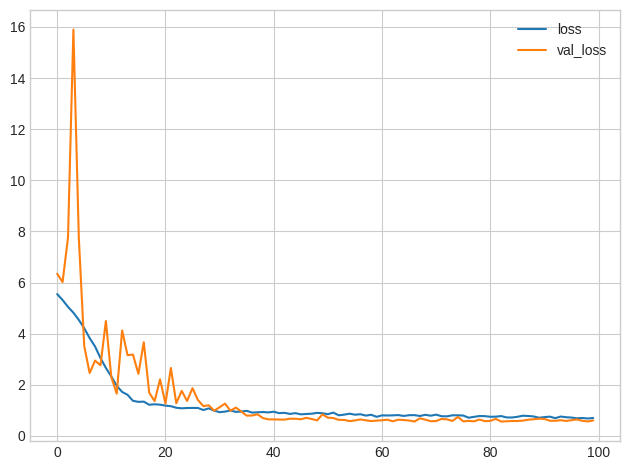

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

You'll typically get better performance if you standardize your data before using it for training. That we were able to use the raw data at all, however, shows how effective batch normalization can be on more difficult datasets.

# Your Turn #

Move on to [**improve predictions**](https://www.kaggle.com/kernels/fork/11887342) on the *Spotify* dataset with dropout and see how batch normalization can help with difficult datasets.

# Introduction #

So far in this course, we've learned about how neural networks can solve regression problems. Now we're going to apply neural networks to another common machine learning problem: classification. Most everything we've learned up until now still applies. The main difference is in the loss function we use and in what kind of outputs we want the final layer to produce.

# Binary Classification #

Classification into one of two classes is a common machine learning problem. You might want to predict whether or not a customer is likely to make a purchase, whether or not a credit card transaction was fraudulent, whether deep space signals show evidence of a new planet, or a medical test evidence of a disease. These are all **binary classification** problems.

In your raw data, the classes might be represented by strings like `"Yes"` and `"No"`, or `"Dog"` and `"Cat"`. Before using this data we'll assign a **class label**: one class will be `0` and the other will be `1`. Assigning numeric labels puts the data in a form a neural network can use.

# Accuracy and Cross-Entropy #

**Accuracy** is one of the many metrics in use for measuring success on a classification problem. Accuracy is the ratio of correct predictions to total predictions: `accuracy = number_correct / total`. A model that always predicted correctly would have an accuracy score of `1.0`. All else being equal, accuracy is a reasonable metric to use whenever the classes in the dataset occur with about the same frequency.

The problem with accuracy (and most other classification metrics) is that it can't be used as a loss function. SGD needs a loss function that changes smoothly, but accuracy, being a ratio of counts, changes in "jumps". So, we have to choose a substitute to act as the loss function. This substitute is the *cross-entropy* function.

Now, recall that the loss function defines the *objective* of the network during training. With regression, our goal was to minimize the distance between the expected outcome and the predicted outcome. We chose MAE to measure this distance.

For classification, what we want instead is a distance between *probabilities*, and this is what cross-entropy provides. **Cross-entropy** is a sort of measure for the distance from one probability distribution to another.
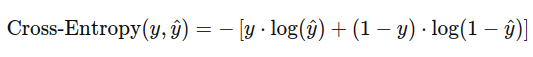

For multi-class classification with C classes, the cross-entropy is

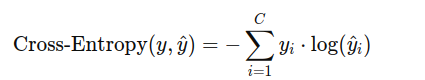
<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/DwVV9bR.png" width="400" alt="Graphs of accuracy and cross-entropy.">
<figcaption style="textalign: center; font-style: italic"><center>Cross-entropy penalizes incorrect probability predictions.</center></figcaption>
</figure>


**IMPORTANT:**

**Search for the difference between sparse categorical cross entropy and categorical cross entropy**


The idea is that we want our network to predict the correct class with probability `1.0`. The further away the predicted probability is from `1.0`, the greater will be the cross-entropy loss.

The technical reasons we use cross-entropy are a bit subtle, but the main thing to take away from this section is just this: use cross-entropy for a classification loss; other metrics you might care about (like accuracy) will tend to improve along with it.

# Making Probabilities with the Sigmoid Function #

The cross-entropy and accuracy functions both require probabilities as inputs, meaning, numbers from 0 to 1. To covert the real-valued outputs produced by a dense layer into probabilities, we attach a new kind of activation function, the **sigmoid activation**.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/FYbRvJo.png" width="400" alt="The sigmoid graph is an 'S' shape with horizontal asymptotes at 0 to the left and 1 to the right. ">
<figcaption style="textalign: center; font-style: italic"><center>The sigmoid function maps real numbers into the interval $[0, 1]$.</center></figcaption>
</figure>

To get the final class prediction, we define a *threshold* probability. Typically this will be 0.5, so that rounding will give us the correct class: below 0.5 means the class with label 0 and 0.5 or above means the class with label 1. A 0.5 threshold is what Keras uses by default with its [accuracy metric](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/BinaryAccuracy).

# Example - Binary Classification #

Now let's try it out!

The [Ionosphere](https://archive.ics.uci.edu/ml/datasets/Ionosphere) dataset contains features obtained from radar signals focused on the ionosphere layer of the Earth's atmosphere. The task is to determine whether the signal shows the presence of some object, or just empty air.

In [ ]:

import pandas as pd
from IPython.display import display

ion = pd.read_csv(f'{ryanholbrook_dl_course_data_path}/ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


We'll define our model just like we did for the regression tasks, with one exception. In the final layer include a `'sigmoid'` activation so that the model will produce class probabilities.

In [ ]:
df_train.shape[1]

34

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

feat_num = X_train.shape[1]

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[feat_num]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Add the cross-entropy loss and accuracy metric to the model with its `compile` method. For two-class problems, be sure to use `'binary'` versions. (Problems with more classes will be slightly different.) The Adam optimizer works great for classification too, so we'll stick with it.

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

The model in this particular problem can take quite a few epochs to complete training, so we'll include an early stopping callback for convenience.

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=100,
    callbacks=[early_stopping],
    #verbose=0, # hide the output because we have so many epochs
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - binary_accuracy: 0.3577 - loss: 0.7022 - val_binary_accuracy: 0.2190 - val_loss: 0.7222
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - binary_accuracy: 0.3618 - loss: 0.6996 - val_binary_accuracy: 0.2286 - val_loss: 0.7178
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - binary_accuracy: 0.4024 - loss: 0.6972 - val_binary_accuracy: 0.2667 - val_loss: 0.7138
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - binary_accuracy: 0.4390 - loss: 0.6949 - val_binary_accuracy: 0.3714 - val_loss: 0.7106
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - binary_accuracy: 0.5285 - loss: 0.6932 - val_binary_accuracy: 0.4857 - val_loss: 0.7080
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - binary_accuracy: 0.5772 - loss: 0.6919 - val_binary_accuracy: 0.5333 - val_loss: 0.7060
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - binary_accuracy: 0.6057 - loss: 0.6909 - val_binary_accuracy: 0.5810 - val_loss: 0.7044
Epoch 8/100
1/1 ━━━━

We'll take a look at the learning curves as always, and also inspect the best values for the loss and accuracy we got on the validation set. (Remember that early stopping will restore the weights to those that got these values.)

Best Validation Loss: 0.6407
Best Validation Accuracy: 0.8095


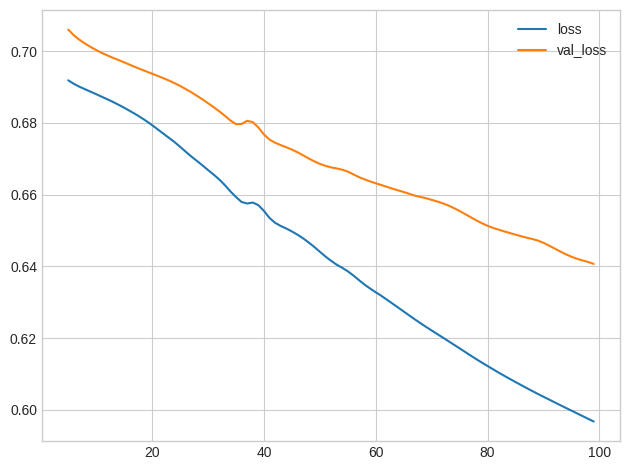

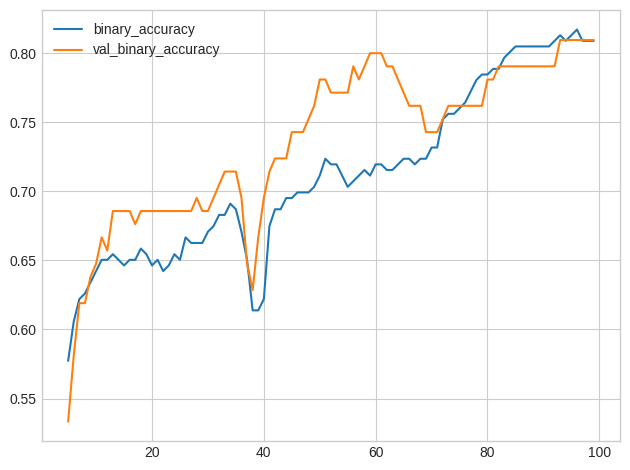

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

# Assignment
# 🏨 Hotel Reservation Cancellation - Neural Network Challenge

## 🧩 Problem Description

Hotel managers often face a serious challenge: **last-minute reservation cancellations**. Predicting whether a reservation will be canceled in advance helps optimize room availability, reduce losses, and improve customer service.

In this assignment, you’ll build a **binary classification model** using an **Artificial Neural Network (ANN)** to predict **whether a hotel reservation will be canceled** based on various features like booking time, number of guests, room type, deposit type, and more.

---

## 🎯 Learning Goals

This assignment is designed not just to build an accurate model, but to **deeply understand how model architecture and training strategies affect performance**. You'll:

- Learn how underfitting and overfitting look on real data.
- Use regularization techniques (Dropout, EarlyStopping).
- Simplify architectures to control model complexity.
- Try **Batch Normalization** and assess its impact.

---

## 🛠️ Your Tasks

1. **Preprocess the Data**
   - Load the hotel reservation dataset (Already down for you below).
   - Handle missing values, encode categorical variables, and scale numeric features.
   - split data into train/validation/test splits

2. **Build a Baseline ANN Model**
   - Use a simple architecture to establish a baseline.
   - Evaluate performance on validation and test sets.

3. **Generate Underfitting**
   - Intentionally create an **underfit** model (e.g., one small hidden layer, too few epochs).
   - Plot the training vs validation loss/accuracy.
   - 📌 **Fix it** by increasing model capacity or training time.

4. **Generate Overfitting**
   - Create a model that **overfits** (e.g., too many layers, too wide, too long training).
   - Plot and analyze the gap between training and validation performance.
   - 📌 **Fix it using:**
     - Dropout layers
     - EarlyStopping callback
     - Reducing complexity (fewer neurons/layers)

5. **Experiment with Batch Normalization**
   - Add BatchNormalization layers.
   - Compare training dynamics with and without it over the same number of epochs.

6. **Summarize What You Learned**
   - Write a short reflection on:
     - How you diagnosed each problem (underfit/overfit)
     - Which solution worked best and why
     - What advice you'd give your past self about designing ANN architectures for tabular data

---

## 📊 Metrics to Use

- Accuracy, Precision, Recall, F1-Score
- Confusion Matrix
- Visuals of training/validation accuracy & loss

---

## 📦 Deliverables

- Your well-commented code (Jupyter or Colab notebook on Github)
- Short written reflections as markdown cells
- Visualizations and explanation of decisions


## Load the data

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import kagglehub
ryanholbrook_dl_course_data_path = kagglehub.dataset_download('ryanholbrook/dl-course-data')
print('Data source import complete.')
hotel = pd.read_csv(f'{ryanholbrook_dl_course_data_path}/hotel.csv')




Data source import complete.


In [30]:
hotel.shape

(119390, 32)

In [31]:
hotel.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [32]:
hotel['country'].dropna(inplace = True)
hotel['children'].dropna(inplace = True)

In [33]:
hotel.drop(columns=['company'],axis = 1,inplace = True)
hotel['agent'] = hotel['agent'].fillna(hotel['agent'].mode()[0])

In [45]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87388 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87388 non-null  object 
 1   is_canceled                     87388 non-null  int64  
 2   lead_time                       87388 non-null  int64  
 3   arrival_date_year               87388 non-null  int64  
 4   arrival_date_month              87388 non-null  object 
 5   arrival_date_week_number        87388 non-null  int64  
 6   arrival_date_day_of_month       87388 non-null  int64  
 7   stays_in_weekend_nights         87388 non-null  int64  
 8   stays_in_week_nights            87388 non-null  int64  
 9   adults                          87388 non-null  int64  
 10  children                        87384 non-null  float64
 11  babies                          87388 non-null  int64  
 12  meal                            8738

In [35]:
hotel.duplicated().sum()

np.int64(32002)

In [37]:
hotel.drop_duplicates(inplace = True)

In [39]:
X = hotel.copy()
y = X.pop('is_canceled')

In [40]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [41]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [42]:
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)
X_train = np.asarray(X_train).astype('float32')
X_val = np.asarray(X_val).astype('float32')
X_test = np.asarray(X_test).astype('float32')
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (52432, 1144)
Validation set shape: (17478, 1144)
Test set shape: (17478, 1144)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7815 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 2/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7231 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 3/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7230 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 4/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7207 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 5/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7201 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 6/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7188 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 7/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7221 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 8/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7246 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 9/50
205/205 ━━━━

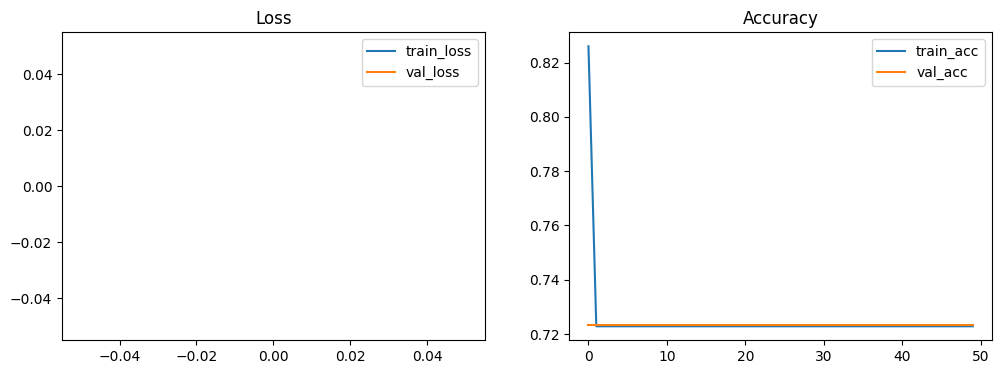

In [43]:
def build_baseline_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

input_shape = (X_train.shape[1],)
baseline_model = build_baseline_model(input_shape)

history = baseline_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    verbose=1
)
test_loss, test_acc = baseline_model.evaluate(X_test, y_test, verbose=0)
print(f"Baseline Test Accuracy: {test_acc:.4f}")
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(history.history['loss'], label='train_loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_title('Loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train_acc')
    ax2.plot(history.history['val_accuracy'], label='val_acc')
    ax2.set_title('Accuracy')
    ax2.legend()

    plt.show()

plot_history(history)

Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7119 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7211 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7262 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7223 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7248 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7234 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7215 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7243 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 9/20
205/205 ━━━━━

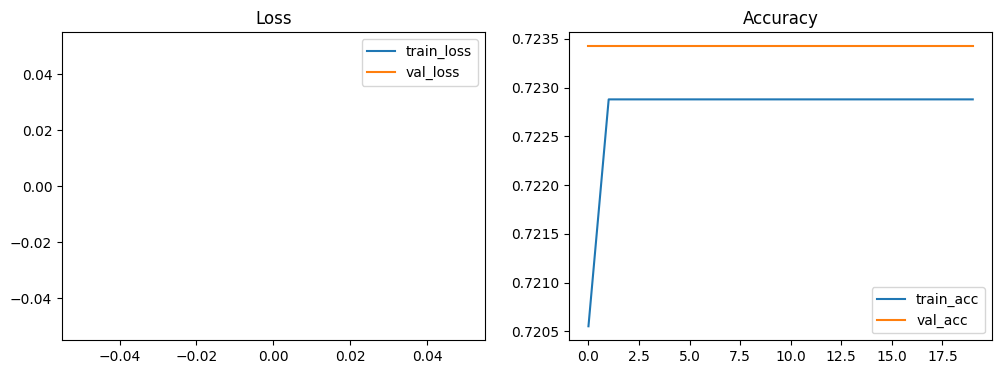

Epoch 1/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7744 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 2/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7234 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 3/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7254 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 4/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7229 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 5/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7249 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 6/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7233 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 7/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7232 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 8/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7225 - loss: nan - val_accuracy: 0.7234 - val_loss: nan
Epoch 9/100
20

KeyboardInterrupt: 

In [44]:
def build_underfit_model(input_shape):
    model = keras.Sequential([
        layers.Dense(8, activation='relu', input_shape=input_shape),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

underfit_model = build_underfit_model(input_shape)

history = underfit_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=256,
    verbose=1
)

plot_history(history)
fixed_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

fixed_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

history = fixed_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=256,
    verbose=1
)

plot_history(history)

In [ ]:
def build_overfit_model(input_shape):
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=input_shape),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

overfit_model = build_overfit_model(input_shape)

history = overfit_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=256,
    verbose=1
)

plot_history(history)
fixed_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

fixed_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = fixed_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=256,
    callbacks=[early_stopping],
    verbose=1
)

plot_history(history)

In [ ]:
def build_model_with_bn(input_shape):
    model = keras.Sequential([
        layers.Dense(128, input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(64),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

bn_model = build_model_with_bn(input_shape)

history_bn = bn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    verbose=1
)
regular_model = build_baseline_model(input_shape)

history_regular = regular_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    verbose=1
)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_bn.history['val_accuracy'], label='With BN')
plt.plot(history_regular.history['val_accuracy'], label='Without BN')
plt.title('Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_bn.history['val_loss'], label='With BN')
plt.plot(history_regular.history['val_loss'], label='Without BN')
plt.title('Validation Loss')
plt.legend()
plt.show()

In [ ]:
final_model = keras.Sequential([
    layers.Dense(128, input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

final_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=256,
    callbacks=[early_stopping],
    verbose=1
)
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")

print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Test Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Test F1-Score: {f1_score(y_test, y_pred):.4f}")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1. Diagnosing Underfitting and Overfitting
Underfitting:

Symptoms: Both training and validation accuracy were low, and the model failed to improve significantly with more epochs. The loss curves plateaued at a high value.

Diagnosis: The model was too simple (e.g., only one small hidden layer) and lacked the capacity to learn meaningful patterns.

Solution: Increased model complexity by adding more layers/neurons and trained for more epochs.

Overfitting:

Symptoms: Training accuracy kept improving, but validation accuracy stagnated or worsened. The gap between training and validation loss widened.

Diagnosis: The model memorized training data instead of generalizing (e.g., too many layers/neurons, too many epochs).

Solution: Applied dropout layers, early stopping, and reduced model complexity.

2. Which Solutions Worked Best?
For Underfitting: Increasing model size (e.g., 128 → 64 neurons) and training longer (with early stopping) worked well.

For Overfitting:

Dropout (0.3-0.5): Effectively reduced overfitting by randomly deactivating neurons.

Early Stopping: Prevented unnecessary training after validation loss stopped improving.

Batch Normalization: Stabilized training and helped models converge faster.

3. Advice to My Past Self
Start Moderate: Begin with a balanced architecture (e.g., 2-3 hidden layers, 64-128 neurons).

Regularize Early: Use dropout and batch norm from the start to prevent overfitting.

Monitor Validation Metrics: Always track validation loss/accuracy to detect overfitting early.

Avoid Excessive Complexity: For tabular data, deep networks (5+ layers) often don’t help—simpler models generalize better.

Use Callbacks: Early stopping and learning rate schedulers save time and improve results.
